#                         Analysis of Suicide Rates in India

**Suicide** is the third leading cause of death among young adults worldwide. There is a growing recognition that prevention strategies need to be tailored to the region-specific demographics of a country and to be implemented in a culturally-sensitive manner. This review explores the historical, epidemiological and demographic factors of suicide in India.

**Facts about suicides in India:**
* About 800,000 people commit suicide worldwide every year, of these 135,000 are residents of India.
* 17 percent residents of the global suicide sufferers belong to India.
* Every hour, 1 student commits suicide in India.

Each suicide is a personal tragedy that prematurely takes the life of an individual and has a continuing ripple effect, affecting the lives of families, friends and communities. Every year, more than 1,00,000 people commit suicide in our country. There are various causes of suicides like professional/career problems, sense of isolation, abuse, violence, family problems, mental disorders, addiction to alcohol, financial loss, chronic pain etc.

**Project Stages:**
* Data Collection
* Data Cleaning
* Analysis And Visualization
* Findings

## Installing Required Libraries

In [10]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet

## Importing required packages

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data Collection

In [12]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


## Stage 2 : Data Cleaning

In [13]:
# See the common statistics of the data

df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [15]:
# print the all the states available in the dataset

print(df['State'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [16]:
# Replacing the union territories as states

df.replace('A & N Islands (Ut)', 'A & N Islands', inplace = True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace = True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace = True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace = True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace = True)
df.replace('Delhi (Ut)', 'Delhi', inplace = True)

df.replace('Bankruptcy or Sudden change in Economic', 'Bankruptcy or Sudden change in Economic Status', inplace = True)

df.replace('Others (Please Specify)', 'By Other means', inplace = True)
df.replace('Not having Children(Barrenness/Impotency', 'Not having Children (Barrenness/Impotency)', inplace = True)

In [17]:
# Here we remove all the values whose exact causes are not known, this is to ensure that the data whose cause is not known does not
# end up affecting our analysis.

df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | (df.State =='Total (States)')].index)
df = df.drop(df[(df.Type == 'By Other means') | (df.Type =='Other Causes (Please Specity)') | (df.Type =='Other Causes (Please Specify)') | (df.Type =='Causes Not known') | (df.Type =='By Other means (please specify)')].index)
df = df.drop(df[df['Total'] == 0].index)

## Stage 3: Analysis And Visualization of Data

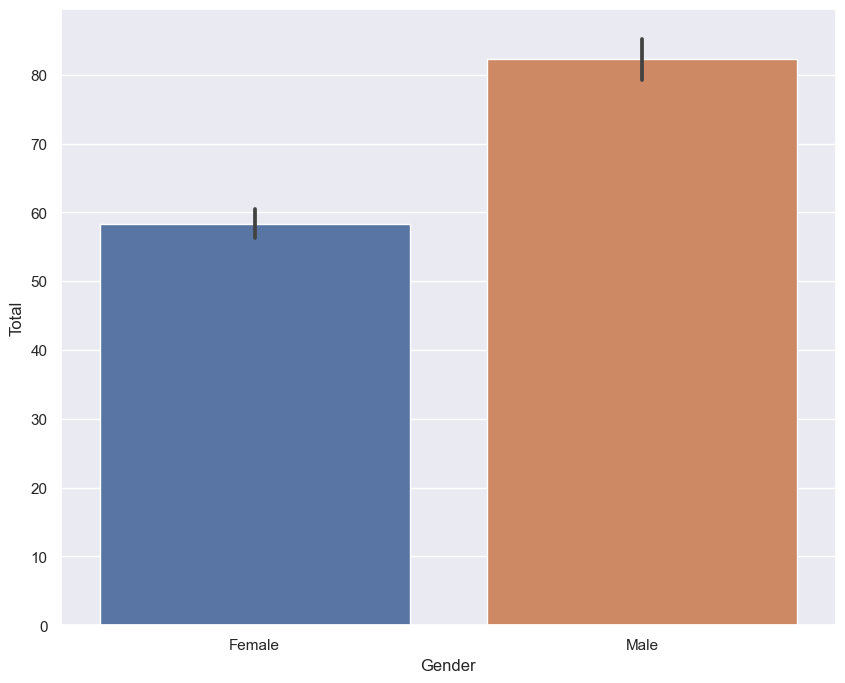

In [18]:
#Plot a bargraph based on the gender to see which gender people commit the most suicides

sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=df['Gender'], y=df['Total']);

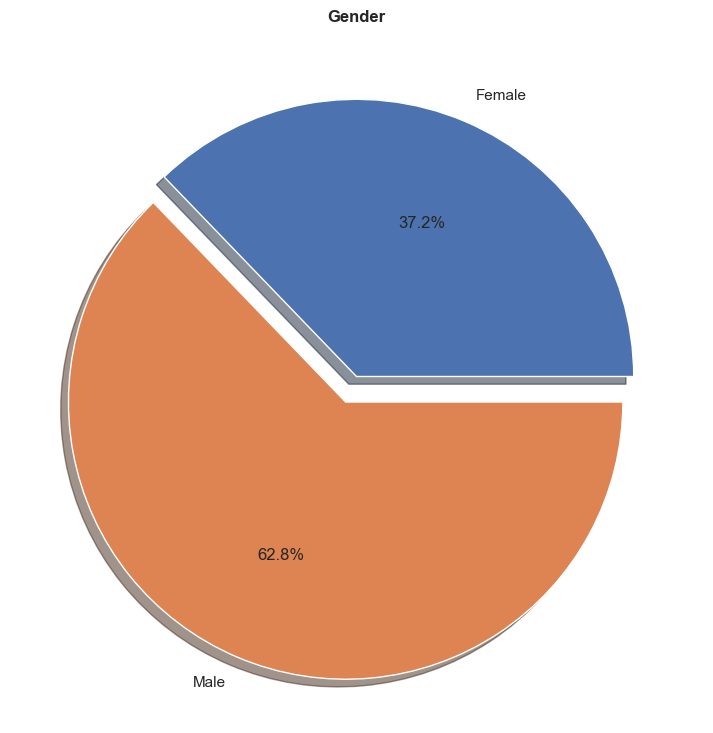

In [69]:
# pie chart showing the percentage stats

df_gender = df.groupby('Gender')['Total'].sum()
df_gender_type = pd.DataFrame(df_gender).reset_index().sort_values('Total')
labels = df_gender_type['Gender']
exp = (0,0.1)
plt.pie(df_gender_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.title("Gender", fontweight='bold')
plt.show()

In [20]:
# Here we are spliting the data into different age groups

gp_age = df.groupby('Age_group')['Total'].sum()
df_age_type = pd.DataFrame(gp_age).reset_index().sort_values('Age_group')
df_age_type = df_age_type.drop([0])
df_age_type

,Age_group,Total
1,0-14,59358
2,15-29,1197721
3,30-44,1113501
4,45-59,652452
5,60+,246480


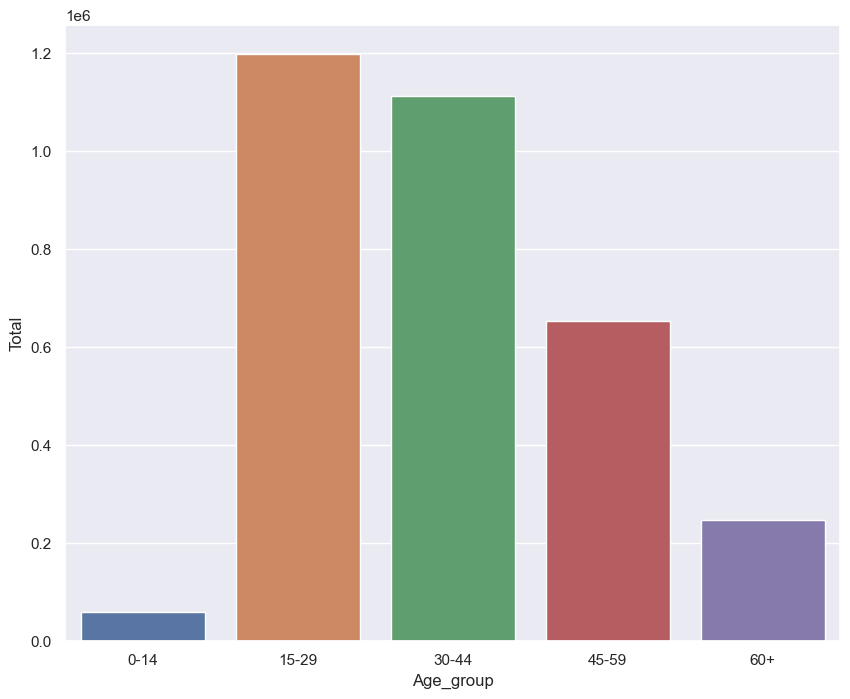

In [21]:
# Draw a bargraph categorising the people into different age groups

sns.barplot(x = df_age_type['Age_group'], y = df_age_type['Total']);

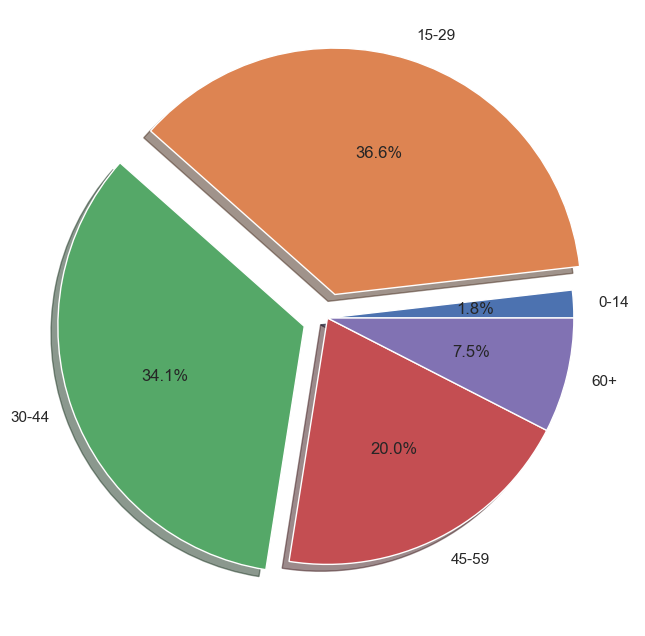

In [22]:
# Draw the same bargraph as a pie chart to see the percentage stats

labels = df_age_type['Age_group']
exp = (0,0.1,0.1,0,0)
plt.pie(df_age_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.show()

In [23]:
# Here we are further categorising the age groups based on gender 
df_age = df.drop(df[(df['Age_group'] == '0-100+')].index)
df_age = df_age.groupby(['Age_group', 'Gender'])['Total'].sum()
df_age_gender = pd.DataFrame(df_age).reset_index().sort_values('Age_group')
df_age_gender

,Age_group,Gender,Total
0,0-14,Female,31213
1,0-14,Male,28145
2,15-29,Female,582173
3,15-29,Male,615548
4,30-44,Female,385019
5,30-44,Male,728482
6,45-59,Female,179904
7,45-59,Male,472548
8,60+,Female,73470
9,60+,Male,173010


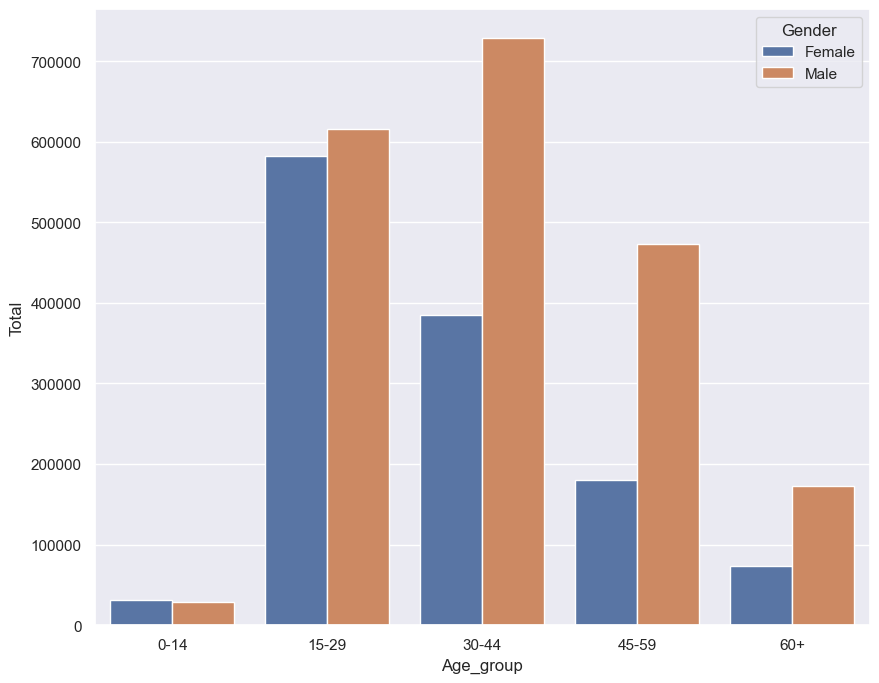

In [24]:
# Bargraph for the above data

sns.barplot(x = "Age_group", y = "Total", hue = "Gender", data=df_age_gender);

The State/UT wise information on the incidents of suicides, its percentage share in total suicides and rate of suicides during the year are presented in the graphs below:

In [25]:
# Here we are grouping the data statewise so as to see which state has the most cases.

group = df.groupby('State')['Total'].sum()
tot_suicides = pd.DataFrame(group).reset_index().sort_values('Total',ascending=False)

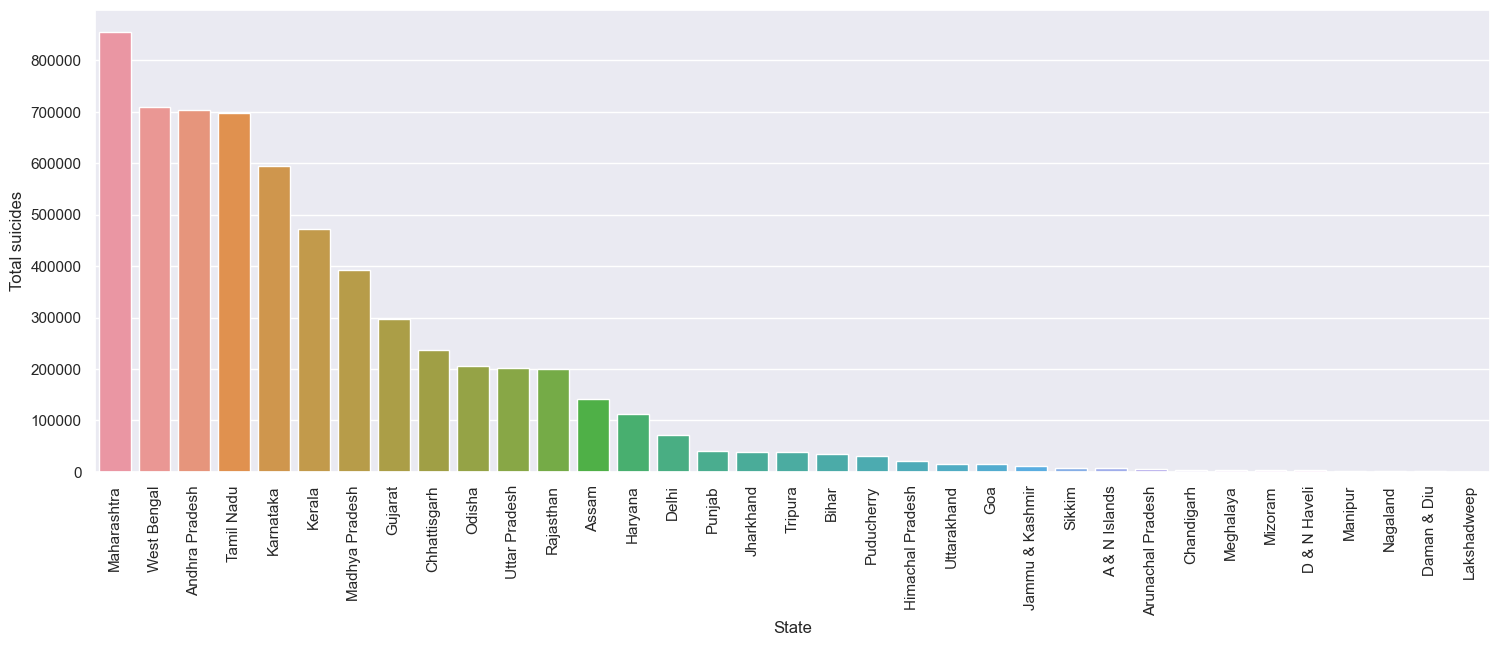

In [61]:
# Draw a bargraph categorising the data into statewise form, which is obtained from above

fig, ax = plt.subplots(figsize=(18,6))
plot = sns.barplot(x = 'State', y = 'Total', data = tot_suicides)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.ylabel('Total suicides')
plt.show()

In [27]:
# Here we are grouping the data yearwise so as to see which year has the most cases.

group_yr = df.groupby('Year')['Total'].sum()
yr = pd.DataFrame(group_yr).reset_index().sort_values('Year',ascending=False)
print(group_yr)

Year
2001    467928
2002    476738
2003    482322
2004    486323
2005    486115
2006    512676
2007    522233
2008    531216
2009    539470
2010    564083
2011    564376
2012    547894
Name: Total, dtype: int64


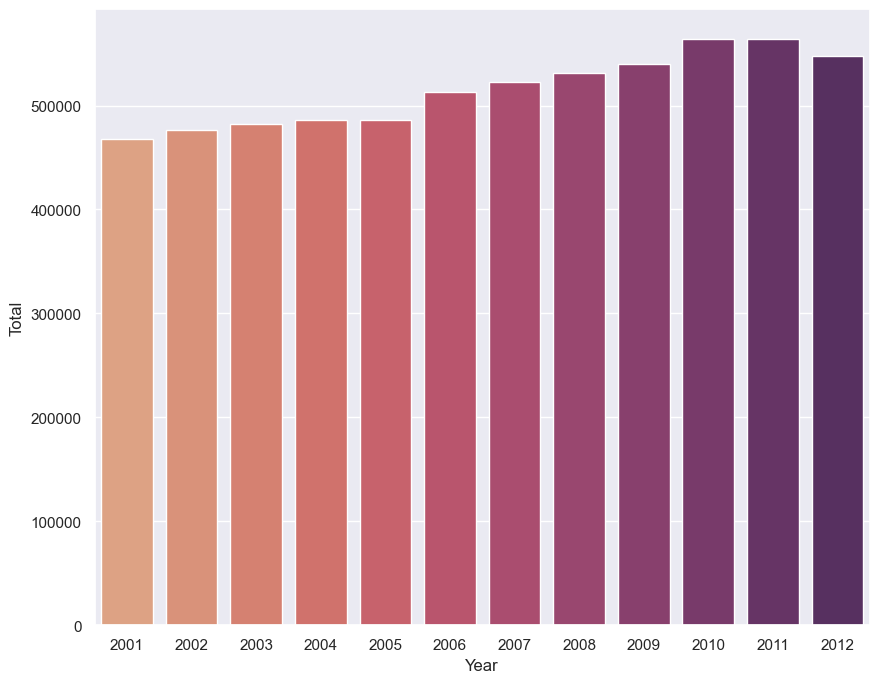

In [28]:
# Draw a bargraph categorising the data into yearwise form, which is obtained from above

plot = sns.barplot(x = 'Year', y = 'Total', data = yr, palette = 'flare')

In [34]:
# Segregating the data where Type_code is Social_Status 

df_bycode = df[df['Type_code'] == 'Social_Status']
df_bycode['Type'].unique()

array(['Married', 'Never Married', 'Divorcee', 'Widowed/Widower',
       'Seperated'], dtype=object)

In [35]:
# Grouping the data into its each of its constituent types

df_social = df_bycode.groupby('Type')['Total'].sum()
df_social_type = pd.DataFrame(df_social).reset_index().sort_values('Total')
print(f'People who have mentioned their Social Status {df_bycode.shape[0]}')

People who have mentioned their Social Status 3349


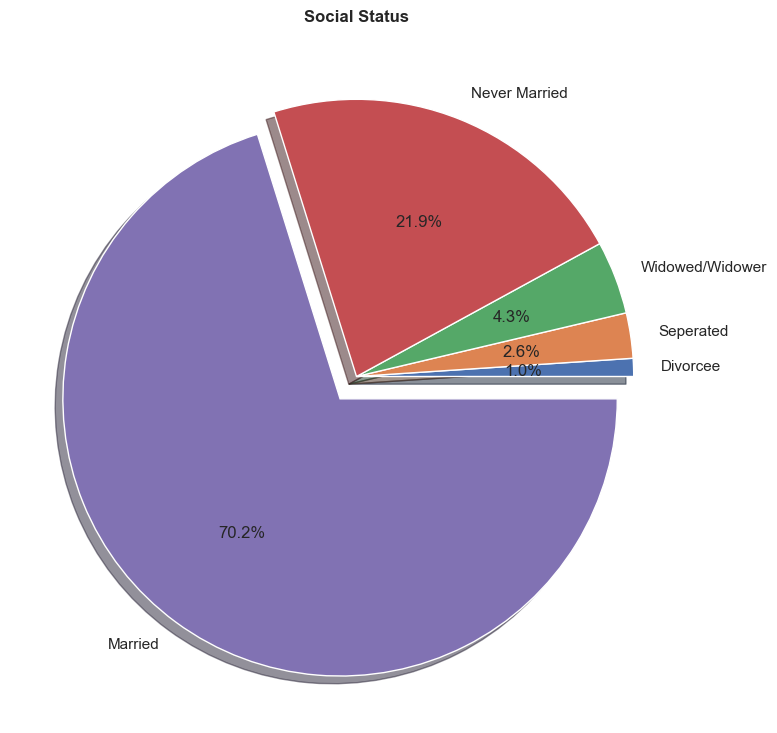

In [68]:
# Drawing a pie chart of the data that we have grouped above

labels = df_social_type['Type']
exp = (0,0,0,0,0.1)
plt.pie(df_social_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.title("Social Status", fontweight='bold')
plt.show()

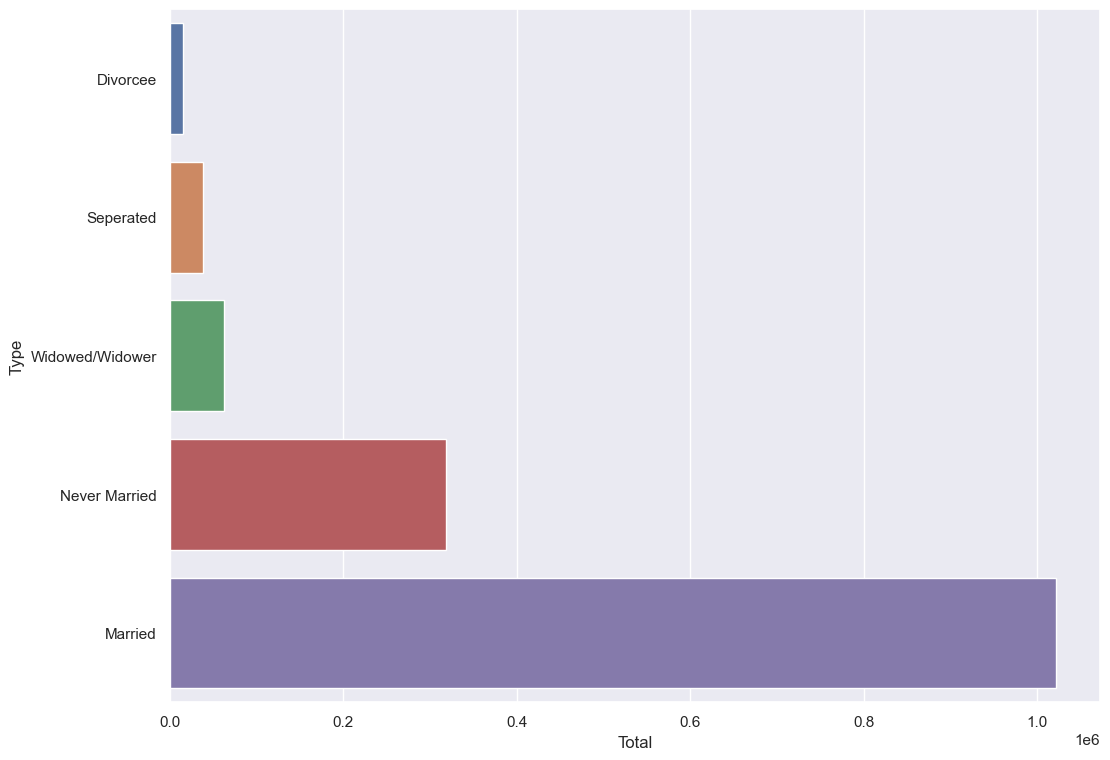

In [71]:
#Drawing the same pie chart as a bargraph to see the absolute values

sns.barplot(x = df_social_type['Total'], y=df_social_type['Type']);

In [39]:
# Segregating the data where Type_code is Professional_Profile

df_bycode = df[df['Type_code'] == 'Professional_Profile']
df_bycode['Type'].unique()

array(['Student', 'House Wife', 'Service (Private)',
       'Public Sector Undertaking', 'Service (Government)',
       'Farming/Agriculture Activity', 'Retired Person',
       'Self-employed (Business activity)', 'Unemployed',
       'Professional Activity'], dtype=object)

In [40]:
# Grouping the data into its each of its above constituent types

df_byProfession = df_bycode.groupby('Type')['Total'].sum()
df_Profession_Type = pd.DataFrame(df_byProfession).reset_index().sort_values('Total')
print(f'People who mentioned their Professions {df_bycode.shape[0]}')

People who mentioned their Professions 17782


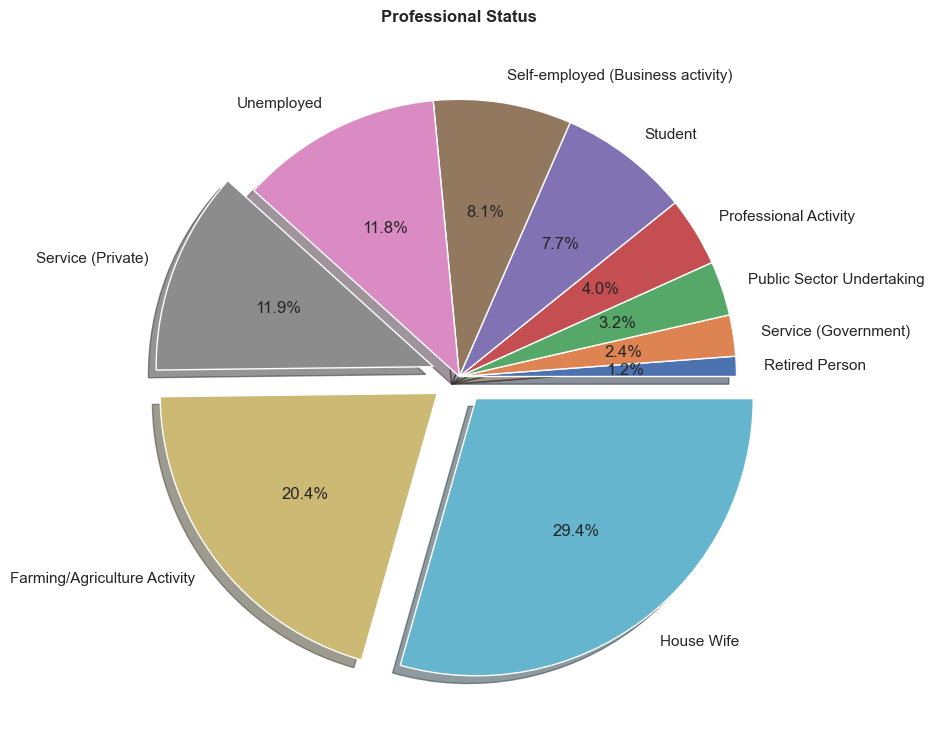

In [72]:
# Drawing a pie chart of the data that we have grouped above

labels = df_Profession_Type['Type']
exp = (0,0,0,0,0,0,0,0.1,0.1,0.1)
plt.pie(df_Profession_Type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.title("Professional Status", fontweight='bold')
plt.show()

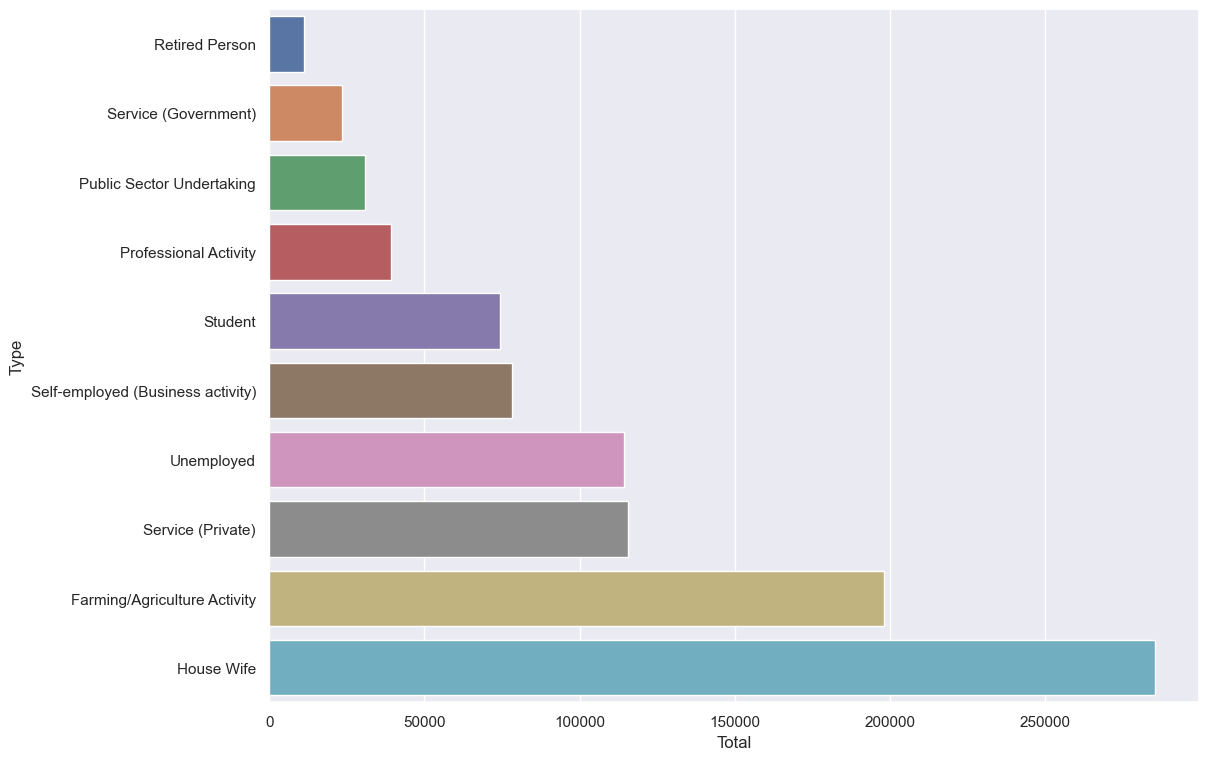

In [43]:
sns.barplot(x = df_Profession_Type['Total'], y=df_Profession_Type['Type']);

In [44]:
# Segregating the data where Type_code is Means_adopted

df_bycode = df[df['Type_code'] == 'Means_adopted']
df_bycode['Type'].unique()

array(['By Hanging', 'By Fire/Self Immolation',
       'By Consuming Other Poison', 'By Drowning',
       'By Consuming Insecticides', 'By touching electric wires',
       'By Fire-Arms', 'By Overdose of sleeping pills',
       'By coming under running vehicles/trains',
       'By Jumping off Moving Vehicles/Trains',
       'By Jumping from (Other sites)', 'By Over Alcoholism',
       'By Jumping from (Building)', 'By Self Infliction of injury',
       'By Machine'], dtype=object)

In [45]:
# Grouping the data into its each of its above constituent types

df_bymeans = df_bycode.groupby('Type')['Total'].sum()
df_means = pd.DataFrame(df_bymeans).reset_index().sort_values('Total')
print(f'Total number of People whose means of suicide is mentioned is {df_bycode.shape[0]}')

Total number of People whose means of suicide is mentioned is 26709


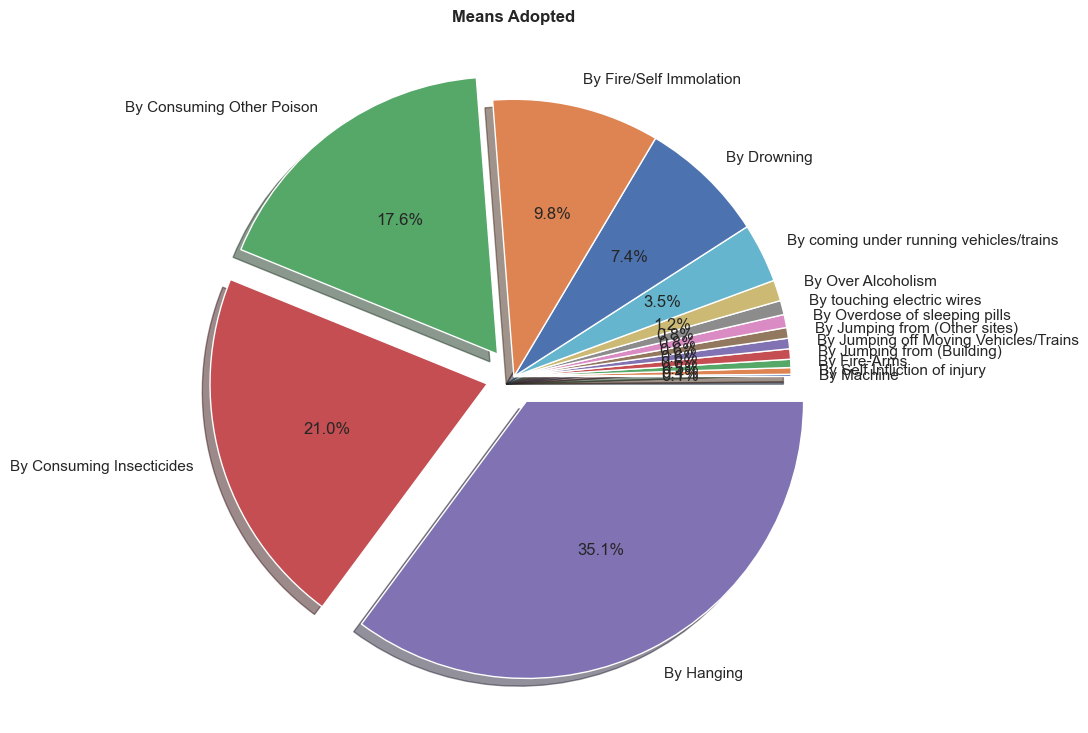

In [73]:
# Drawing a pie chart of the data that we have grouped above

labels = df_means['Type']
exp = [0]*(len(labels.unique())-3) + [0.1,0.1,0.1]
plt.pie(df_means['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.title("Means Adopted", fontweight='bold')
plt.show()

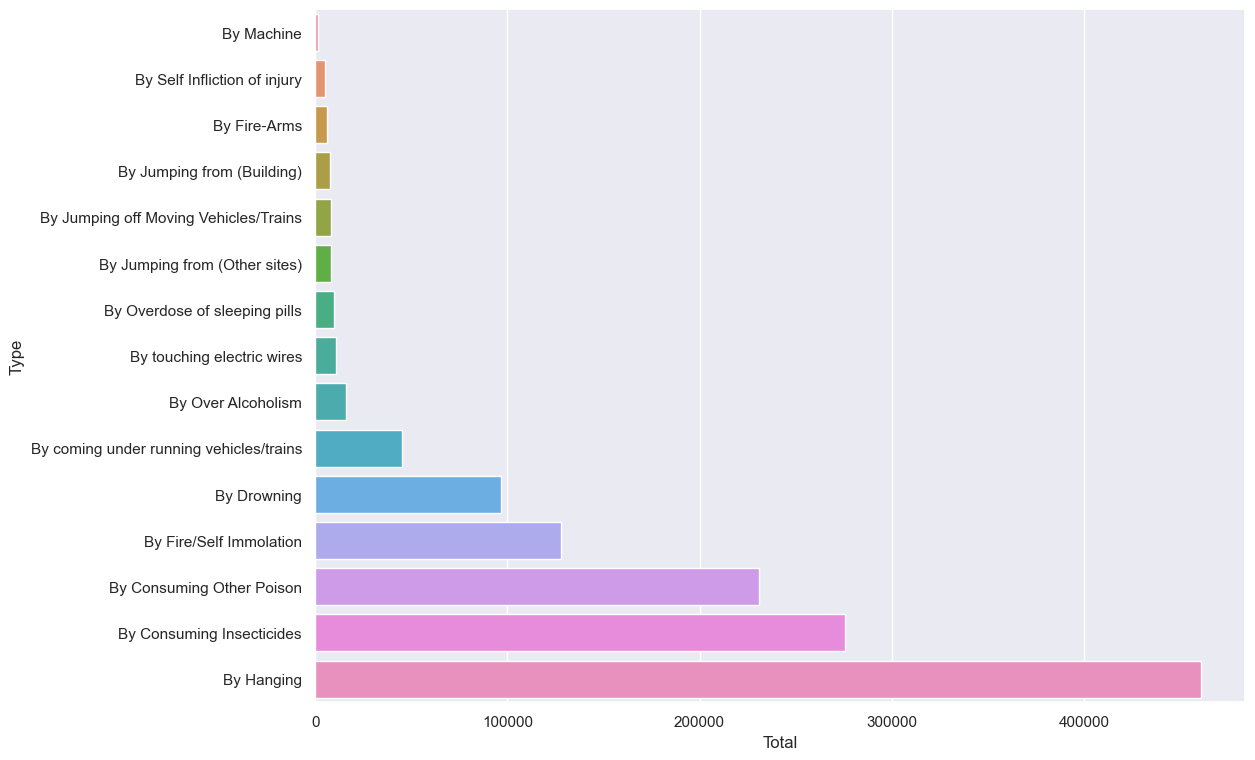

In [48]:
sns.barplot(x = df_means['Total'], y=df_means['Type']);

In [49]:
# Segregating the data where Type_code is Education_Status

df_bycode = df[df['Type_code'] == 'Education_Status']
df_bycode['Type'].unique()

array(['No Education', 'Middle', 'Primary', 'Matriculate/Secondary',
       'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit',
       'Post Graduate and Above', 'Diploma'], dtype=object)

In [50]:
# Grouping the data into its each of its above constituent types

df_byeducation = df_bycode.groupby('Type')['Total'].sum()
df_education = pd.DataFrame(df_byeducation).reset_index().sort_values('Total')
print(f'Total number of People whose Educational Status is mentioned is {df_bycode.shape[0]}')

Total number of People whose Educational Status is mentioned is 5602


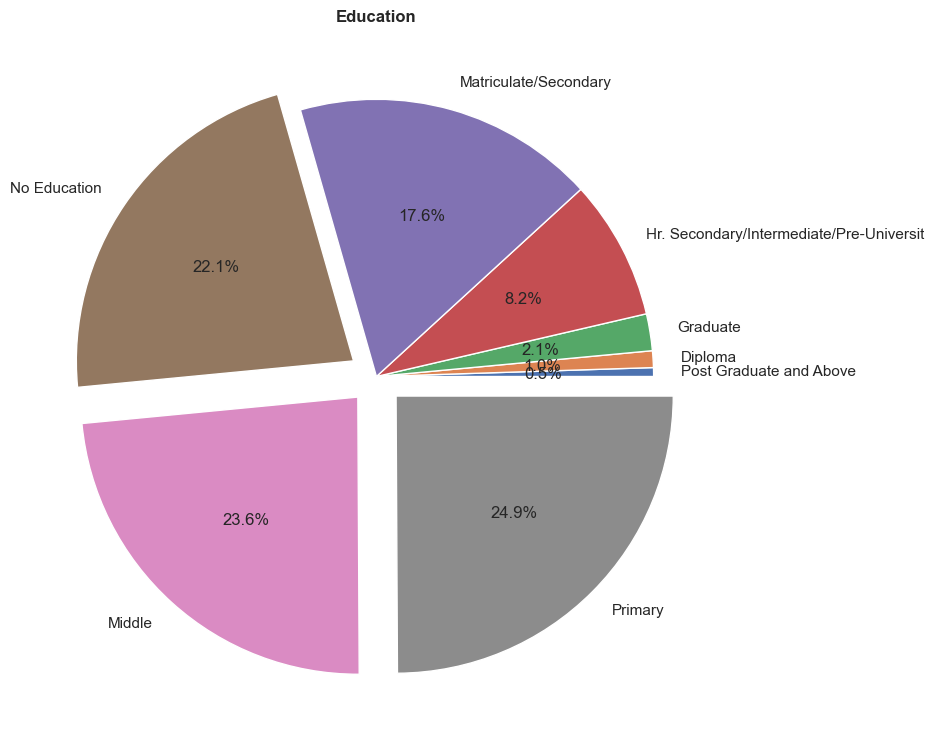

In [74]:
# Drawing a pie chart of the data that we have grouped above

labels = df_education['Type']
plt.pie(df_education['Total'], labels=labels, autopct='%1.1f%%', explode = [0,0,0,0,0,0.1,0.1,0.1])
plt.title("Education", fontweight='bold')
plt.show()

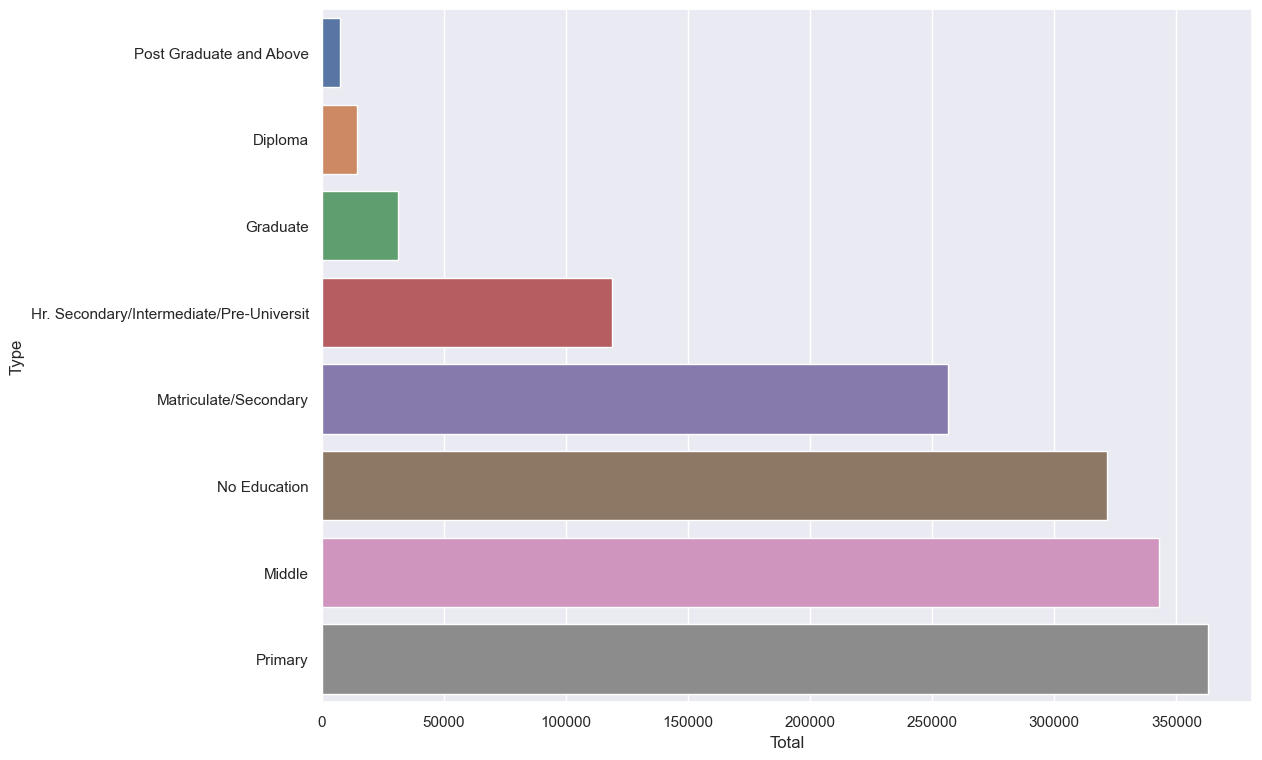

In [52]:
sns.barplot(x = df_education['Total'], y=df_education['Type']);

In [53]:
# Segregating the data where Type_code is Causes

df_bycode = df[df['Type_code'] == 'Causes']
df_bycode['Type'].unique()

array(['Love Affairs', 'Other Prolonged Illness',
       'Failure in Examination', 'Family Problems',
       'Insanity/Mental Illness', 'Death of Dear Person', 'Unemployment',
       'Fall in Social Reputation', 'Suspected/Illicit Relation',
       'Cancellation/Non-Settlement of Marriage',
       'Not having Children (Barrenness/Impotency)', 'Poverty',
       'Professional/Career Problem', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status', 'Divorce',
       'Cancer', 'Property Dispute', 'Illness (Aids/STD)',
       'Physical Abuse (Rape/Incest Etc.)', 'Drug Abuse/Addiction',
       'Ideological Causes/Hero Worshipping', 'Dowry Dispute',
       'Illegitimate Pregnancy',
       'Not having Children (Barrenness/Impotency'], dtype=object)

In [54]:
# Grouping the data into its each of its above constituent types

df_bycauses = df_bycode.groupby('Type')['Total'].sum()
df_causes = pd.DataFrame(df_bycauses).reset_index().sort_values('Total')
print(f'Total causes that have led to Suicide {df_bycode.shape[0]}')

Total causes that have led to Suicide 33134


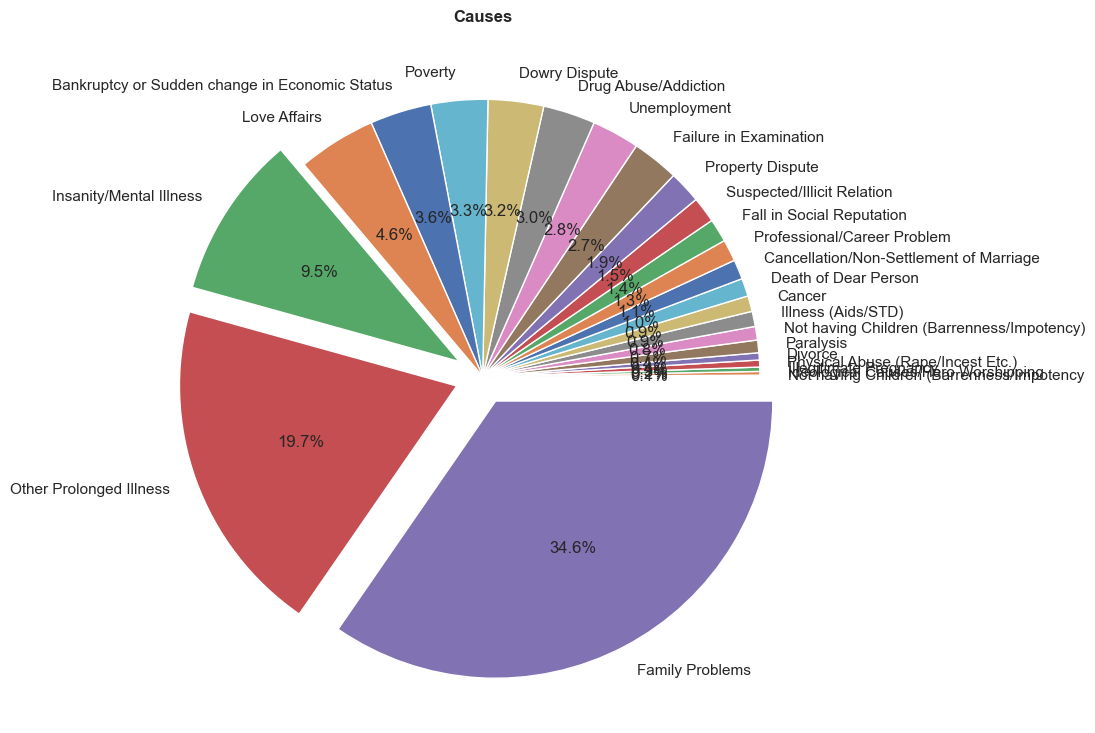

In [75]:
# Drawing a pie chart of the data that we have grouped above

labels = df_causes['Type']
exp = [0]*(len(labels.unique())-3) + [0.1,0.1,0.1]
plt.pie(df_causes['Total'], labels=labels, autopct='%1.1f%%', explode = exp)
plt.title("Causes", fontweight='bold')
plt.show()

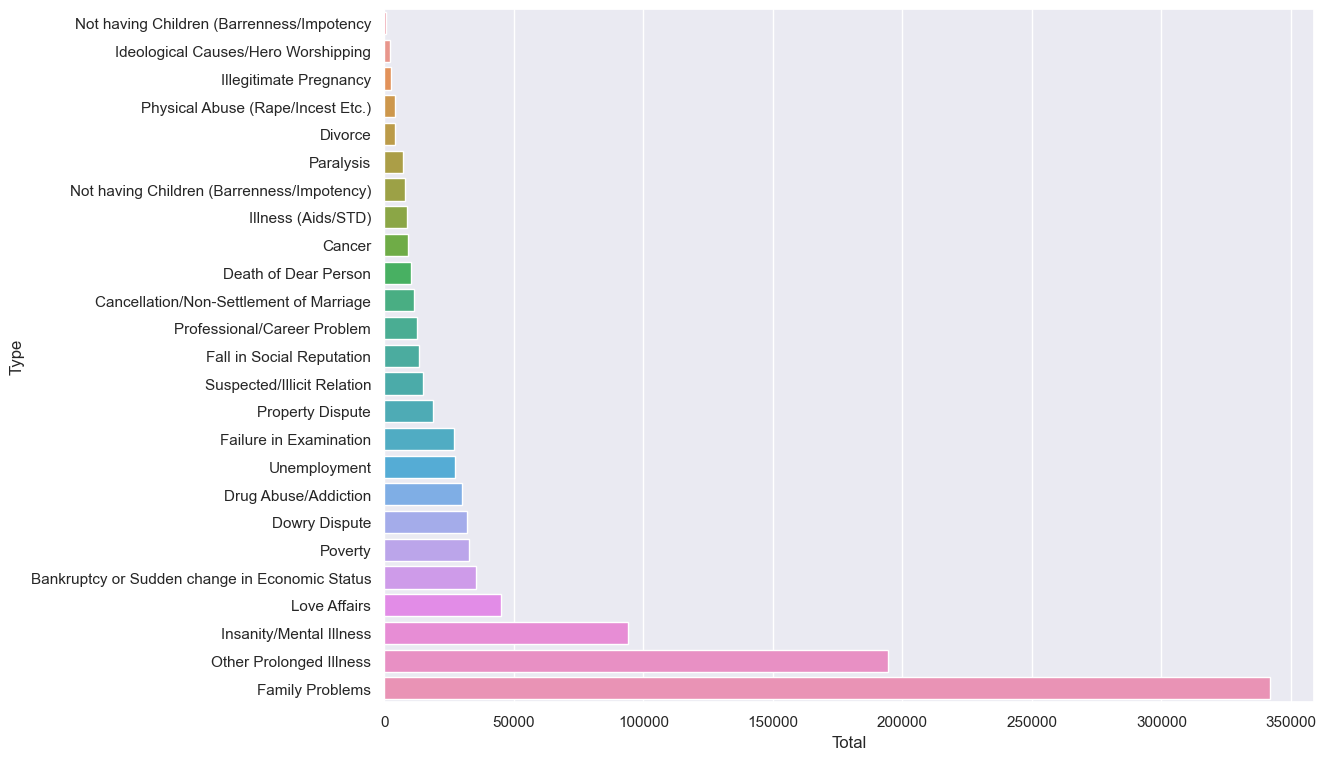

In [56]:
sns.barplot(x = df_causes['Total'], y=df_causes['Type']);

## Stage 4: Findings

* **Males** are more likely to have suicidal instincts than females.
* The number of **males** committing suicide **is higher than that of females in all age groups except in the age group of 0–14**.
* **Maharashtra** has the highest number of suicide rates, followed by West Bengal and Andhra Pradesh.
* The suicide rate was at its **peak in 2011** with 564376 suicides.
* People with no education have lower rates of suicide than people with primary education.
* **Married people** are the major victims of suicide compared to other categories.
* **Hanging** is the most frequently used method of suicide. Hanging was thus seen as the ‘quickest’ and ‘easiest’ method.
* At all age groups, **family problems** seem to be the major cause of suicide; next stands prolonged illness or mental illness.
* **Housewives** are more likely to be victims of suicide, followed by the **farmers**.